In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr
from matplotlib import cm
from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools
import glob 

In [2]:
data = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_outfall_20180101_20211231.nc')
data = data.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04','2019-05','2019-06', '2019-07', '2019-08', '2019-09', '2019-10','2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']
data = data.assign_coords(time = time_values)
data

<xarray.Dataset>
Dimensions:  (time: 48, depth: 40, gridY: 898, gridX: 398)
Coordinates:
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 360.7 387.6 414.5 441.5
  * gridY    (gridY) int64 0 1 2 3 4 5 6 7 8 ... 890 891 892 893 894 895 896 897
  * gridX    (gridX) int64 0 1 2 3 4 5 6 7 8 ... 390 391 392 393 394 395 396 397
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2021-11' '2021-12'
Data variables:
    outfall  (time, depth, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_outfall_20180101_20211231
    description:  Month-averaged Outfall extracted from SalishSeaCast v202111...
    history:      2023-12-12 09:50 -08:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

In [3]:
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth', 'y': 'gridY', 'x': 'gridX'})
tmask

<xarray.DataArray 'tmask' (depth: 40, gridY: 898, gridX: 398)>
[14296160 values with dtype=int8]
Dimensions without coordinates: depth, gridY, gridX

In [4]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_202108.nc')
mesh_mask_depth_var='gdept_0'
thalweg_file = '/home/sallen/MEOPAR/Tools/bathymetry/thalweg_working.txt'
depth = mesh.variables[mesh_mask_depth_var][:]
thalweg_pts = np.loadtxt(thalweg_file, delimiter=' ', dtype=int)

In [6]:
month_names = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",

    13: "January",
    14: "February",
    15: "March",
    16: "April",
    17: "May",
    18: "June",
    19: "July",
    20: "August",
    21: "September",
    22: "October",
    23: "November",
    24: "December",

    25: "January",
    26: "February",
    27: "March",
    28: "April",
    29: "May",
    30: "June",
    31: "July",
    32: "August",
    33: "September",
    34: "October",
    35: "November",
    36: "December",

    37: "January",
    38: "February",
    39: "March",
    40: "April",
    41: "May",
    42: "June",
    43: "July",
    44: "August",
    45: "September",
    46: "October",
    47: "November",
    48: "December"
}

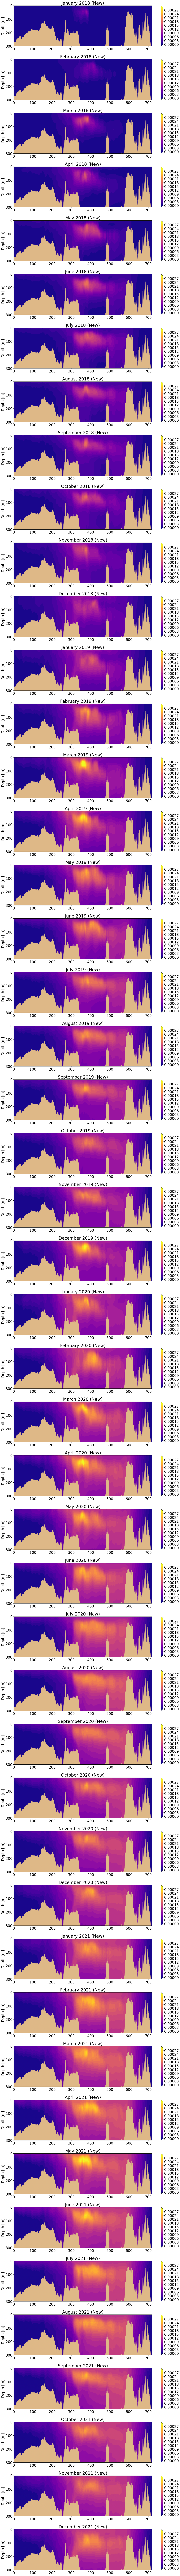

In [11]:
fig, axs = plt.subplots(48, 1, figsize=(15, 200))
jp = 0
plt.rcParams.update({'font.size': 20})
for month in range(1, 48+1):
    dep_thal, distance, var_thal = vis.load_thalweg(
                depth[0, ...], np.array(data.outfall[month-1]), bathy['nav_lon'][:], bathy['nav_lat'][:],
                thalweg_pts)
    var_plot = vis._fill_in_bathy(var_thal, mesh, thalweg_pts)
    colours = axs[jp].contourf(distance, dep_thal, var_plot, np.arange(0, 0.0003, 0.00001), 
                                     cmap='plasma', extend='both')
    #axs[jp].contour(distance, dep_thal, var_plot, [2e-5, 1e-4], colors='green')
    vis._add_bathy_patch(
            distance, bathy['Bathymetry'][:], thalweg_pts, axs[jp], color='burlywood')
    cbar = fig.colorbar(colours, ax=axs[jp])
    axs[jp].invert_yaxis()
    axs[jp].set_ylim(300, 0)
    axs[jp].set_ylabel('Depth [m]')
    if month <= 12:
        axs[jp].set_title(f'{month_names[month]} 2018 (New)')
    elif month > 12 and month <= 24:
        axs[jp].set_title(f'{month_names[month]} 2019 (New)')
    elif month > 24 and month <= 36:
        axs[jp].set_title(f'{month_names[month]} 2020 (New)')
    else:
        axs[jp].set_title(f'{month_names[month]} 2021 (New)')
    jp = jp + 1
    
fig.tight_layout()